# Pipelines

- Como trabalhar com Pipelines e o diferencial de termos eles em nossos projetos

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# load and split the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data
                            , cancer.target 
                            , random_state=0)

# compute minimum and maximum on the training data
scaler = MinMaxScaler().fit(X_train)

In [2]:
# rescale the training data
X_train_scaled = scaler.transform(X_train)

svm = SVC()
# learn an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scale the test data and score the scaled data
X_test_scaled = scaler.transform(X_test)
print("Test score: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test score: 0.97


## Exemplo agora utilizando Pipelines 

In [9]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("estimator", SVC())
])

In [4]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('SVM', SVC())])

In [5]:
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.97


### GridSearchCV em pipelines 

In [12]:
param_grid = {
    'estimator__C': [0.1, 1, 10, 100],
    'estimator__kernel': ['linear', 'rbf', 'poly'],
    'estimator__gamma': [0.1, 0.01, 0.001, 0.0001]
}

In [13]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("METRICS' RESULTS")
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

METRICS' RESULTS
Best cross-validation accuracy: 0.98
Test set score: 0.96
Best parameters: {'estimator__C': 10, 'estimator__gamma': 0.1, 'estimator__kernel': 'linear'}


### Exemplo de leaking (vazamento)

In [14]:
import numpy as np

rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

from sklearn.feature_selection import SelectPercentile, f_regression
select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
print("X_selected.shape: {}".format(X_selected.shape))

X_selected.shape: (100, 500)


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

print("Cross-validation accuracy (cv only on ridge): {:.2f}".format(
np.mean(cross_val_score(Ridge(), X_selected, y, cv=5))))

Cross-validation accuracy (cv only on ridge): 0.91


In [16]:
pipe = Pipeline([
    ("select", SelectPercentile(score_func=f_regression,percentile=5)),
    ("ridge", Ridge())
])

print("Cross-validation accuracy (pipeline): {:.2f}".format(
np.mean(cross_val_score(pipe, X, y, cv=5))))


Cross-validation accuracy (pipeline): -0.25


## Creation with make_pipeline

In [23]:
from sklearn.pipeline import make_pipeline

make_pipe = make_pipeline(MinMaxScaler(),SVC())

In [25]:
make_pipe.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

# Acessando parâmetros

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('SScaler', StandardScaler()), ('estimator', LogisticRegression())])

param_grid = {'estimator__C':[.01, .1, 1, 10, 100],
              'estimator__solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'estimator__penalty':['l1','l2','elasticnet', None]
              }

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=42)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None w

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('SScaler', StandardScaler()),
                                       ('estimator', LogisticRegression())]),
             param_grid={'estimator__C': [0.01, 0.1, 1, 10, 100],
                         'estimator__penalty': ['l1', 'l2', 'elasticnet', None],
                         'estimator__solver': ['lbfgs', 'liblinear',
                                               'newton-cg', 'newton-cholesky',
                                               'sag', 'saga']})

In [32]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('SScaler', StandardScaler()),
                ('estimator',
                 LogisticRegression(C=0.01, penalty=None, solver='saga'))])


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('SScaler', StandardScaler()), ('estimator', LogisticRegression())])

param_grid = {'estimator__C':[.01, .1, 1, 10, 100]}

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=42)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('SScaler', StandardScaler()),
                                       ('estimator', LogisticRegression())]),
             param_grid={'estimator__C': [0.01, 0.1, 1, 10, 100]})

In [34]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('SScaler', StandardScaler()),
                ('estimator', LogisticRegression(C=10))])


In [35]:
print("Best estimator:\n{}".format(grid.best_estimator_.named_steps["estimator"]))

Best estimator:
LogisticRegression(C=10)


In [36]:
print("Logistic regression coefficients:\n{}".format(grid.best_estimator_.named_steps["estimator"].coef_))

Logistic regression coefficients:
[[ 0.01559634 -0.19828172  0.23505534 -0.27390037 -0.39359893  2.94062805
  -1.31672318 -3.39000419  0.91262345 -1.02386013 -3.62153176  0.66292036
  -0.10576852 -2.19282102 -0.30469832  0.10258468  0.37125806 -1.47505149
   1.37682261  2.05968138 -1.73146187 -2.42802563  0.05138329 -1.93391932
  -0.10341889  0.65348111 -2.35762942 -0.61404887 -2.71493656 -0.38967079]]


## Preprocessing using GridSearchCV

In [39]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target
                                                    , test_size=.2
                                                    , random_state=0)


In [59]:
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures()),
    ('estimator', Ridge())
])

In [60]:
param_grid = {
    'polynomialfeatures__degree': [1,2,3],
    'estimator__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [61]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('estimator', Ridge())]),
             n_jobs=-1,
             param_grid={'estimator__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'polynomialfeatures__degree': [1, 2, 3]})

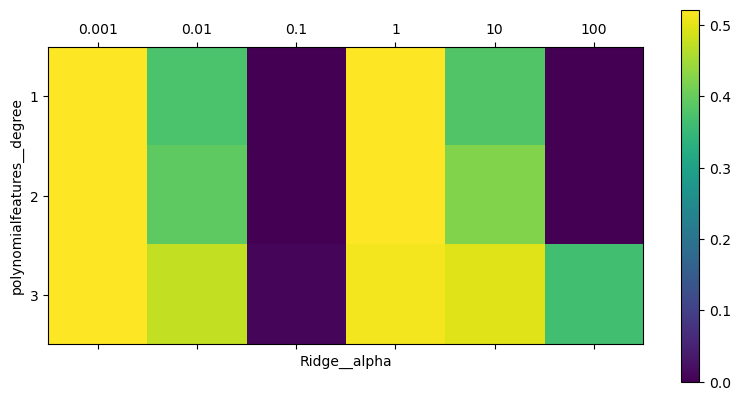

In [62]:
import matplotlib.pyplot as plt

plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1),
                vmin=0, cmap='viridis')
plt.xlabel("Ridge__alpha")
plt.ylabel("polynomialfeatures__degree")

plt.xticks(
             range(len(param_grid['estimator__alpha']))
           , param_grid['estimator__alpha']
    )
plt.yticks(
      range(len(param_grid['polynomialfeatures__degree']))
    , param_grid['polynomialfeatures__degree']
)

_ = plt.colorbar()

In [63]:
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'estimator__alpha': 10, 'polynomialfeatures__degree': 1}


In [64]:
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Test-set score: 0.33


In [65]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Score without poly features: {:.2f}".format(grid.score(X_test, y_test)))

Score without poly features: 0.33


# GridSearch Which Model to Use

In [66]:
pipe = Pipeline([
    ('preprocessing', StandardScaler()), ('classifier', SVC())
])

In [67]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
    'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},

    {'classifier': [RandomForestClassifier(n_estimators = 100)],
     'preprocessing': [None], 'classifier__max_features':[1,2,3]   
    }
]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
                                cancer.data, cancer.target, random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=10)
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': SVC(C=10, gamma=0.01), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}

Best cross-validation score: 0.99
Test-set score: 0.98
